In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import math

**EXERCISE 1**

We want to compute: $I:=\int_{0}^1 \sqrt{1-x^2} \, dx$

1) Uniform midpoint rule, i.e equidistant nodes: </br>
$I\approx \sum_{i=1}^M b_if(c_i)=\sum_{i=1}^M \frac{1}{M}f(\frac{1}{2M}+\frac{i-1}{M})=:\bar{f}_M,$ </br>
where $f(x)=\sqrt{1-x^2}$ and $x\in[0,1]$.


In [2]:
def get_equidistant_nodes(M: int)-> np.array:
    return np.array([1/(2*M)+(i-1)/(M) for i in range(1,M+1)])
def f(x: np.array)-> np.array: #we assume that the values are in [-1,1]
    return np.sqrt(1-x**2)


In [3]:
f_bar_equi: list=[]
errors_equi: list=[]
for M in range(2,31):
    c: np.array=get_equidistant_nodes(M)
    f_bar_equi.append(np.sum(f(c))*(1/M))
    errors_equi.append(abs(f_bar_equi[-1]-math.pi/4))


Plotting I's approximation and $\mid \bar{f}_M -\frac{\pi}{4} \mid$

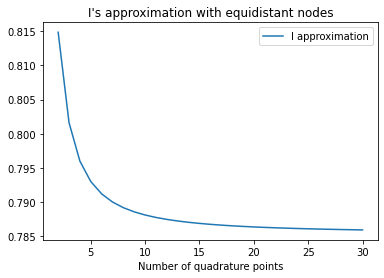

In [21]:
plt.plot(range(2,31), f_bar_equi, label="I approximation")
plt.title("I's approximation with equidistant nodes");
plt.xlabel("Number of quadrature points");
plt.legend(loc='best');

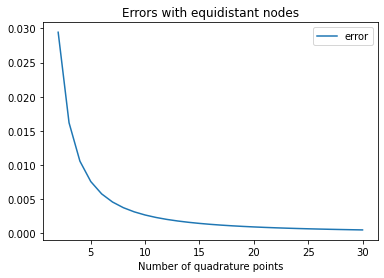

In [5]:
plt.plot(range(2,31), errors_equi, label="error")
plt.title("Errors with equidistant nodes");
plt.xlabel("Number of quadrature points");
plt.legend(loc='best');

The error decreases by increasing $M$, since the approximation of $f$ with a polynomial becomes better with more quadrature points

2) Gaussian quadrature points for $U[-1,1]$ </br>
$I=\int_{0}^1 \sqrt{1-x^2} \, dx=\frac{1}{2}\int_{-1}^1 \sqrt{1-x^2} \, dx$


In [6]:
b_gauss: np.array=np.array([4/9,5/18,5/18])
c_gauss: np.array=np.array([0,math.sqrt(3/5),-math.sqrt(3/5)])
f_bar_gauss: np.array=np.sum(np.dot(f(c_gauss),b_gauss))

Comparison:

In [7]:
print("Approximation of the integral with M=3 equidistant nodes:", f_bar_equi[1])
print("Approximation of the integral with M=3 Gauss quadrature points:", f_bar_gauss)
print("Real value of the integral:", math.pi/4)

Approximation of the integral with M=3 equidistant nodes: 0.8016031664534249
Approximation of the integral with M=3 Gauss quadrature points: 0.7958086289075976
Real value of the integral: 0.7853981633974483


In [20]:
#errors
f_bar_equi[1]-math.pi/4, f_bar_gauss-math.pi/4

(0.016205003055976608, 0.010410465510149347)

We see that at the same number of quadrature points (here 3) we get a better approximation with Gauss quadrature rule. 

3) We consider $M$ realizations, $R=\{(x_i,y_i)\}_{i=1}^M$, of $(X,Y)\sim U([0,1]\times[0,1])$ and then: </br>
$I\approx \frac{\mid\{(x_i,y_i)\in R \ s.t \ x_i^2+y_i^2\leq 1 \}\mid}{M}=:\bar{f}_{MC}$. </br>
This because $I$ is the area of the unit circle, which in random terms is the probability of the event $\{(X,Y)\in\{(x,y)\in\mathbb{R}^2 \ s.t \ x^2+y^2\leq 1\}\}$ that we approximate considering uniform probability. 

In [8]:
def get_hits(realizations: np.array):
    return [[realizations[j]] for j in range(realizations.shape[0]) if realizations[j][0]**2+realizations[j][1]**2<=1]

In [9]:
f_MC: list=[]
errors_MC: list=[]
for M in range(10,501,10):
    realizations: np.array=np.array([[np.random.random(), np.random.random()] for _ in range(M)])
    hits: list=get_hits(realizations)
    f_MC.append(len(hits)/M)
    errors_MC.append(abs(f_MC[-1]-math.pi/4))
    

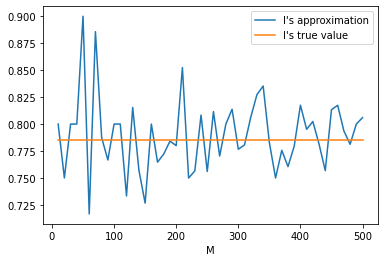

In [10]:
plt.plot(range(10,501,10), f_MC, label="I's approximation")
plt.plot(range(10,501,10), np.array([math.pi/4]*50), label="I's true value")
plt.xlabel("M");
plt.legend(loc='best')

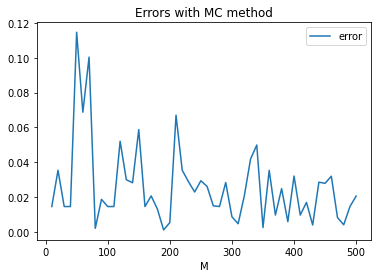

In [11]:
plt.plot(range(10,501,10), errors_MC, label="error")
plt.title("Errors with MC method");
plt.xlabel("M");
plt.legend(loc='best');

4)

In [12]:
realizations: np.array=np.array([[np.random.random(), np.random.random()] for _ in range(100000)])
hits: list=get_hits(realizations)
f_MC_: float=(len(hits))/100000
error_MC=abs(f_MC_-math.pi/4)
print("Absolute error:", error_MC)

Absolute error: 0.0015081633974483033


In [13]:
f_bar_equi2: float=0
error_equi2: float=100 #initialization
M=2
while error_equi2>error_MC:
    c: np.array=get_equidistant_nodes(M)
    f_bar_equi2=np.sum(f(c))*(1/M)
    error_equi2=abs(f_bar_equi2-math.pi/4)
    M+=1

In [14]:
print("M=%a quadrature points are needed to beat the error with MC method using mid-point rule" %M)

M=16 quadrature points are needed to beat the error with MC method using mid-point rule


**EXERCISE 2**

1) Let be $X\sim N(1,3)$ and $f(X)=1+2X+X^2$. </br>
</br>
**$\cdot$** $E[f(X)]=E[1+2X+X^2]=1+2E[X]+E[X^2]=1+2+4=7,$ </br>
where we have used linearity of expectation + $E[X^2]=V[X]+E[X]^2=3+1=4$. </br>
**$\cdot$** We first observe that $\frac{(X-1)^2}{3}\sim \chi^2(1)$ $\left(V[\chi^2(1)]=2\right)$ and we rewrite $f(X)=(X-1)^2+4X$, then: </br>
\begin{align*}
V[f(X)]&=V[(X-1)^2\frac{3}{3}]+16V[X]+2Cov[(X-1)^2,4X]=\\
&=9V[\chi^2(1)]+16*3+8(Cov[X,X^2]+Cov[X,1]-2V[X])=\\
&=9*2+16*3+8(E[X^3]-E[X]E[X^2]-2*3)=18+16*3-8*(10-4-6)=66,
\end{align*}
where the third moment of $X$, given that $X-1\sim N(0,3)$ (then every odd moment is 0 due to density's symmetry), was computed this way: </br>
$E[(X-1)^3]=0 \iff E[X^3]=3E[X^2]-3E[X]+1=10$


2) We approximate $E[f(X)]$ using MC method:
\begin{align*}
E[f(X)]\approx \frac{1}{M}\sum_{i=1}^M f(x_i),
\end{align*}
where $x_i\sim N(1,3)$ and $M\in\{1,2,4,\dots,256\}$. 

In [23]:
def f2(x: float)-> float:
    return 1+2*x+x**2
def empirical_mean(f_M: np.array)->float:
    return np.mean(f_M)
def empirical_variance(f_M: np.array)->float:
    return (1/(N-1))*np.sum((f_M-np.mean(f_M))**2) #unbiased estimator of the variance
    #alternative:
    #return np.var(f_M)

In [24]:
mu: float=1
sigma: float=math.sqrt(3) #standard deviation
N: int=10000
f_M: np.array=np.zeros((128,N)) #i-th row contains the N simulations of f_M for M=i*2 (except for i=0, then M is 1)
count=0
for M in range(1,257,2):
    samples=[np.random.normal(mu,sigma,M) for _ in range(N)]
    f_M[count]=[(1/M)*np.sum(f2(samp)) for samp in samples]
    count+=1


Computing empirical mean and variance of MC estimator of $E[f(X)]$ for each $M$ and visualizing the results:

In [17]:
empirical_means=[empirical_mean(f_M[j]) for j in range(128)]
empirical_variances=[empirical_variance(f_M[k]) for k in range(128)]

Text(0.5, 0, 'M')

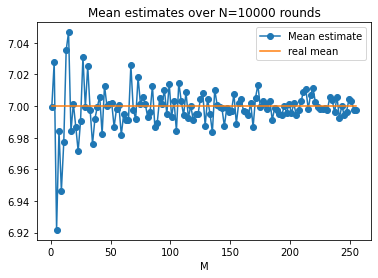

In [18]:
plt.plot(range(1,257,2),empirical_means, label="Mean estimate", marker='o')
plt.plot(range(1,257,2), np.array([7]*128), label="real mean")
plt.legend(loc='best')
plt.title("Mean estimates over N=10000 rounds")
plt.xlabel("M")



We see that when $M$ increases the mean of $\bar{f}_M$ is correctly close to the real value of $E[f(X)]$ (we know that the MC estimator, the sample mean, converges to the mean of $f(X)$ almost surely by LLN).

Text(0.5, 0, 'M')

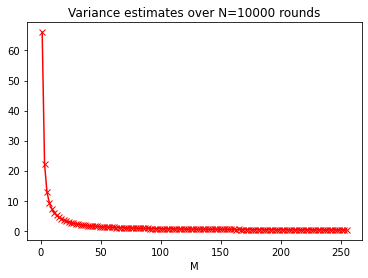

In [19]:
plt.plot(range(1,257,2),empirical_variances, label="Variance estimate", marker='x', c='red')
plt.title("Variance estimates over N=10000 rounds")
plt.xlabel("M")



The variance of $\bar{f}_M$, is $\frac{\sigma^2}{M}$ ($\sigma^2=V[f(X)]$), then we notice that it correctly goes to 0 when $M$ increases and it's close to the real variance. Moreover, since the sample mean is unbiased, the variance represents the MSE. 